# 1 Méthode de recherche dichotomique

Q1:
On raisonne par l'absurde, on suppose que x* est dans un intervalle [ak;bk] et n'est pas dans [ak+1;bk+1].
Si f(xck)>f(xdk) alors x* n'est pas element de [xck;xdk].
-1000
In [ ]:


In [5]:
#Q2:
from math import *

def dicho(f):
    a=-1000
    b=1000
    e=10**(-7)
    while b-a>e:
        c=a+(b-a)/2
        g=a+(b-a)/4
        d=a+3*(b-a)/4
        if f(c)>f(d):
            a=c
        elif f(c)>f(g):
            b=c
        else:
            a=g
            b=d
    return a

def f1(x):
    return abs(x-100)

def f2(x):
    if x>50:
        return (x-50)**(1/2)
    else:
        return (-(x-50))**(1/2)
    
def f3(x):
    return min(4*x,x+5)

def f4(x):
    return -x**3

In [6]:
dicho(f1)

99.99999997671694

In [7]:
dicho(f2)

49.99999995925464

In [8]:
dicho(f3)

-1000

In [9]:
dicho(f4)

999.9999999417923

# 2 Méthode du nombre d'or

Q3:

Q4:
xd  =bk-(alpha-1)*(bk-ak)/alpha
    =(bk/alpha)+ak*(1-1/alpha)
    
xg  =bk*(1-1/alpha)+(ak/alpha)
    =ak+(alpha-1)*(bk-ak)/alpha

Q5:
Pour les deux premiers cas l'interval est divisé par alpha et par 3 dans le 3eme cas.

Q6:
1

Q7: On les disposes a (xd-xg)*alpha=


Q8: alpha = w/v
          = (u+v)/v
          = 1 + u/v
or alpha  = v/u
donc v/u * (1+u/v) = (v/u)**2
<=> 0 = (v/u)**2 - v/u - 1
<=> 0 = alpha**2 - alpha - 1
<=> alpha1 = (1 + 5**(1/2))/2  et alpha2 = (1 - 5**(1/2))/2
=> alpha = alpha1 car alpha>0
            

Q9: Dans les deux premiers cas on divise l'intervale par le nombre d'or. Pour le dernier cas on divise l'intervale par 

Q10: Dans les deux premier cas il faut appeler la fonction une fois et deux fois pour le troisieme cas.

In [45]:
#Q11
from math import *

def nbor(f):
    a=-1000
    b=1000
    e=10**(-7)
    alpha = (1+(5**(1/2)))/2
    xd=b-((alpha-1)*(b-a))/alpha
    xg=a+((alpha-1)*(b-a))/alpha
    fd=f(xd)
    fg=f(xg)
    
    while (b-a)>e:
        if fg>fd:
            a=xg
            xg=xd
            fg=fd
            xd=b-((alpha-1)*(b-a))/alpha
            fd=f(xd)
        elif fg<fd:
            b=xd
            xd=xg
            fd=fg
            xg=a+((alpha-1)*(b-a))/alpha
            fg=f(xg)
        else:
            a=xg
            b=xd
            xd=b-((alpha-1)*(b-a))/alpha
            xg=a+((alpha-1)*(b-a))/alpha
            fd=f(xd)
            fg=f(xg)
    return a



def f1(x):
    return abs(x-100)

def f2(x):
    if x>50:
        return (x-50)**(1/2)
    else:
        return (-(x-50))**(1/2)
    
def f3(x):
    return min(4*x,x+5)

def f4(x):
    return -x**3

In [46]:
nbor(f1)

-236.06797749978966
236.06797749978966
336.06797749978966
136.06797749978966


99.99999996123533

In [47]:
nbor(f2)

-236.06797749978966
236.06797749978966
16.913544202791726
13.640673645380922


49.999999978025656

In [48]:
nbor(f3)

-236.06797749978966
236.06797749978966
-944.2719099991587
241.06797749978966


-1000

In [49]:
nbor(f4)

-236.06797749978966
236.06797749978966
13155617.496424833
-13155617.496424833


999.9999999289363

# 3 Application : Problème d'abonnement avec pénalité

In [50]:
#Q12:
from math import *

def f(p,L,a,b):
    s=0
    for i in range(1,len(L)):
        s+=(max(0,L[i]-p))**2
    return a*p+b*(s**(1/2))

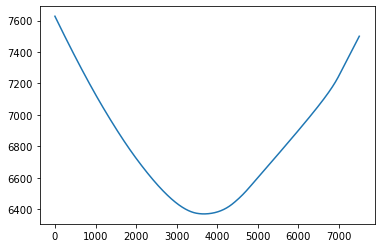

In [63]:
#Q13
from math import *
import numpy as np
import matplotlib.pyplot as plt

def tracer (L,a,b):
    x = np.linspace(0,max(L),5000) 
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i]=f(x[i],L,a,b)
    plt.plot(x,y)
    plt.show()
    
L=[2500,3500,4380,4389,4725,4800,3700,3500,7000,7500,2000,1200]
a=1
b=0.5
tracer(L,a,b)

In [97]:
#Q14
def petoileD(f):
    a=0
    b=max(L)
    e=10**(-7)
    h=0
    while b-a>e:
        c=a+(b-a)/2
        g=a+(b-a)/4
        d=a+3*(b-a)/4
        if f(c,L,1,0.5)>f(d,L,1,0.5):
            a=c
            h+=2
        elif f(c,L,1,0.5)>f(g,L,1,0.5):
            b=c
            h+=4
        else:
            a=g
            b=d
            h+=4
    return a,h

petoileD(f)

(5435.978585448611, 130)

In [91]:
def petoileO(f):
    a=0
    b=max(L)
    e=10**(-7)
    alpha = (1+(5**(1/2)))/2
    xd=b-((alpha-1)*(b-a))/alpha
    xg=a+((alpha-1)*(b-a))/alpha
    fd=f(xd,L,1,0.5)
    fg=f(xg,L,1,0.5)
    
    h=2
    while (b-a)>e:
        if fg>fd:
            a=xg
            xg=xd
            fg=fd
            xd=b-((alpha-1)*(b-a))/alpha
            fd=f(xd,L,1,0.5)
            h+=1
        elif fg<fd:
            b=xd
            xd=xg
            fd=fg
            xg=a+((alpha-1)*(b-a))/alpha
            fg=f(xg,L,1,0.5)
            h+=1
        else:
            a=xg
            b=xd
            xd=b-((alpha-1)*(b-a))/alpha
            xg=a+((alpha-1)*(b-a))/alpha
            fd=f(xd,L,1,0.5)
            fg=f(xg,L,1,0.5)
            h+=2
    return a,h

petoileO(f)

(5131.667452576519, 52)

In [98]:
#Q16
from random import *
import time as time



start = time.time()
h=0
for i in range(100):
    for j in range(len(L)):
        L[j]=randint(0,10000)
    h+=petoileD(f)[1]
end = time.time()
e=end-start
print("dicho: ",e)
print("nb app dicho: ", h)

start = time.time()
h=0
for i in range(100):
    for j in range(len(L)):
        L[j]=randint(0,10000)
    h+=petoileO(f)[1]
end = time.time()
e=end-start
print("or: ",e)
print("nb app or: ", h)



dicho:  0.04808950424194336
nb app dicho:  13574
or:  0.018260955810546875
nb app or:  5018
